<a href="https://colab.research.google.com/github/tisa2002/Student-exam-score-predictor/blob/main/student_examscore_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


In [2]:
# Load the student-mat.csv file with the correct delimiter
student_mat = pd.read_csv('student-mat.csv', delimiter=';')

# Display the first few rows of the dataset
print(student_mat.head())

# Display the column names
print("\nColumn Names in student_mat dataset:")
print(student_mat.columns)


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Column Names in student_mat dataset:
Index(['school', 'sex', 'age', 'address', 'famsize

In [3]:
# Load the student-por.csv file with the correct delimiter
student_por = pd.read_csv('student-por.csv', delimiter=';')

# Display the first few rows of the student-por dataset
print(student_por.head())

# Display the column names
print("\nColumn Names in student_por dataset:")
print(student_por.columns)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

Column Names in student_por dataset:
Index(['school', 'sex', 'age', 'address', 'famsize

In [4]:

# Load the student-mat.csv file with the correct delimiter
student_mat = pd.read_csv('student-mat.csv', delimiter=';')

# Load the student-por.csv file with the correct delimiter
student_por = pd.read_csv('student-por.csv', delimiter=';')

# Identify common attributes to merge on
common_attributes = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
                     'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
                     'traveltime', 'studytime', 'failures', 'schoolsup',
                     'famsup', 'paid', 'activities', 'nursery', 'higher',
                     'internet', 'romantic', 'famrel', 'freetime', 'goout',
                     'Dalc', 'Walc', 'health', 'absences']

# Merge datasets
merged_data = pd.merge(student_mat, student_por, on=common_attributes, suffixes=('_math', '_por'))

# Display the first few rows of the merged dataset
print(merged_data.head())

# Display a sample of the merged dataset
print("\nSample of Merged Dataset:")
print(merged_data.sample(10))

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   M   16       U     LE3       T     2     2    other     other  ...   
1     GP   M   15       U     GT3       A     2     2    other     other  ...   
2     GP   M   15       U     GT3       T     4     3  teacher     other  ...   
3     GP   M   15       U     GT3       T     4     4   health    health  ...   
4     GP   M   15       U     GT3       T     4     4   health  services  ...   

  Dalc Walc  health  absences  G1_math G2_math G3_math G1_por G2_por G3_por  
0    1    1       3         0       12      12      11     13     12     13  
1    1    1       3         0       14      16      16     14     14     15  
2    1    1       1         0       13      14      15     12     13     14  
3    1    1       5         0       12      15      15     11     12     12  
4    3    4       5         0        9      11      12     10     11     11  

[5 rows x 36 columns]

Sample of Merged Data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define target variable and features
target = 'G3_math'
features = ['studytime', 'failures', 'absences', 'G1_math', 'G2_math']

# Extract features and target variable
X = merged_data[features]
y = merged_data[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


r2 = model.score(X_test, y_test)
print(f"R-squared: {r2}")

# Example prediction for a new student
new_student = pd.DataFrame([[5, 1, 3, 11, 13]], columns=features)  # Example data: studytime=5, failures=1, absences=3, G1=11, G2=13
predicted_score = model.predict(new_student)
print(f"Predicted G3_math score: {predicted_score[0]}")


Mean Squared Error: 1.0623780276425567
R-squared: 0.8361633885081359
Predicted G3_math score: 13.209603603463181


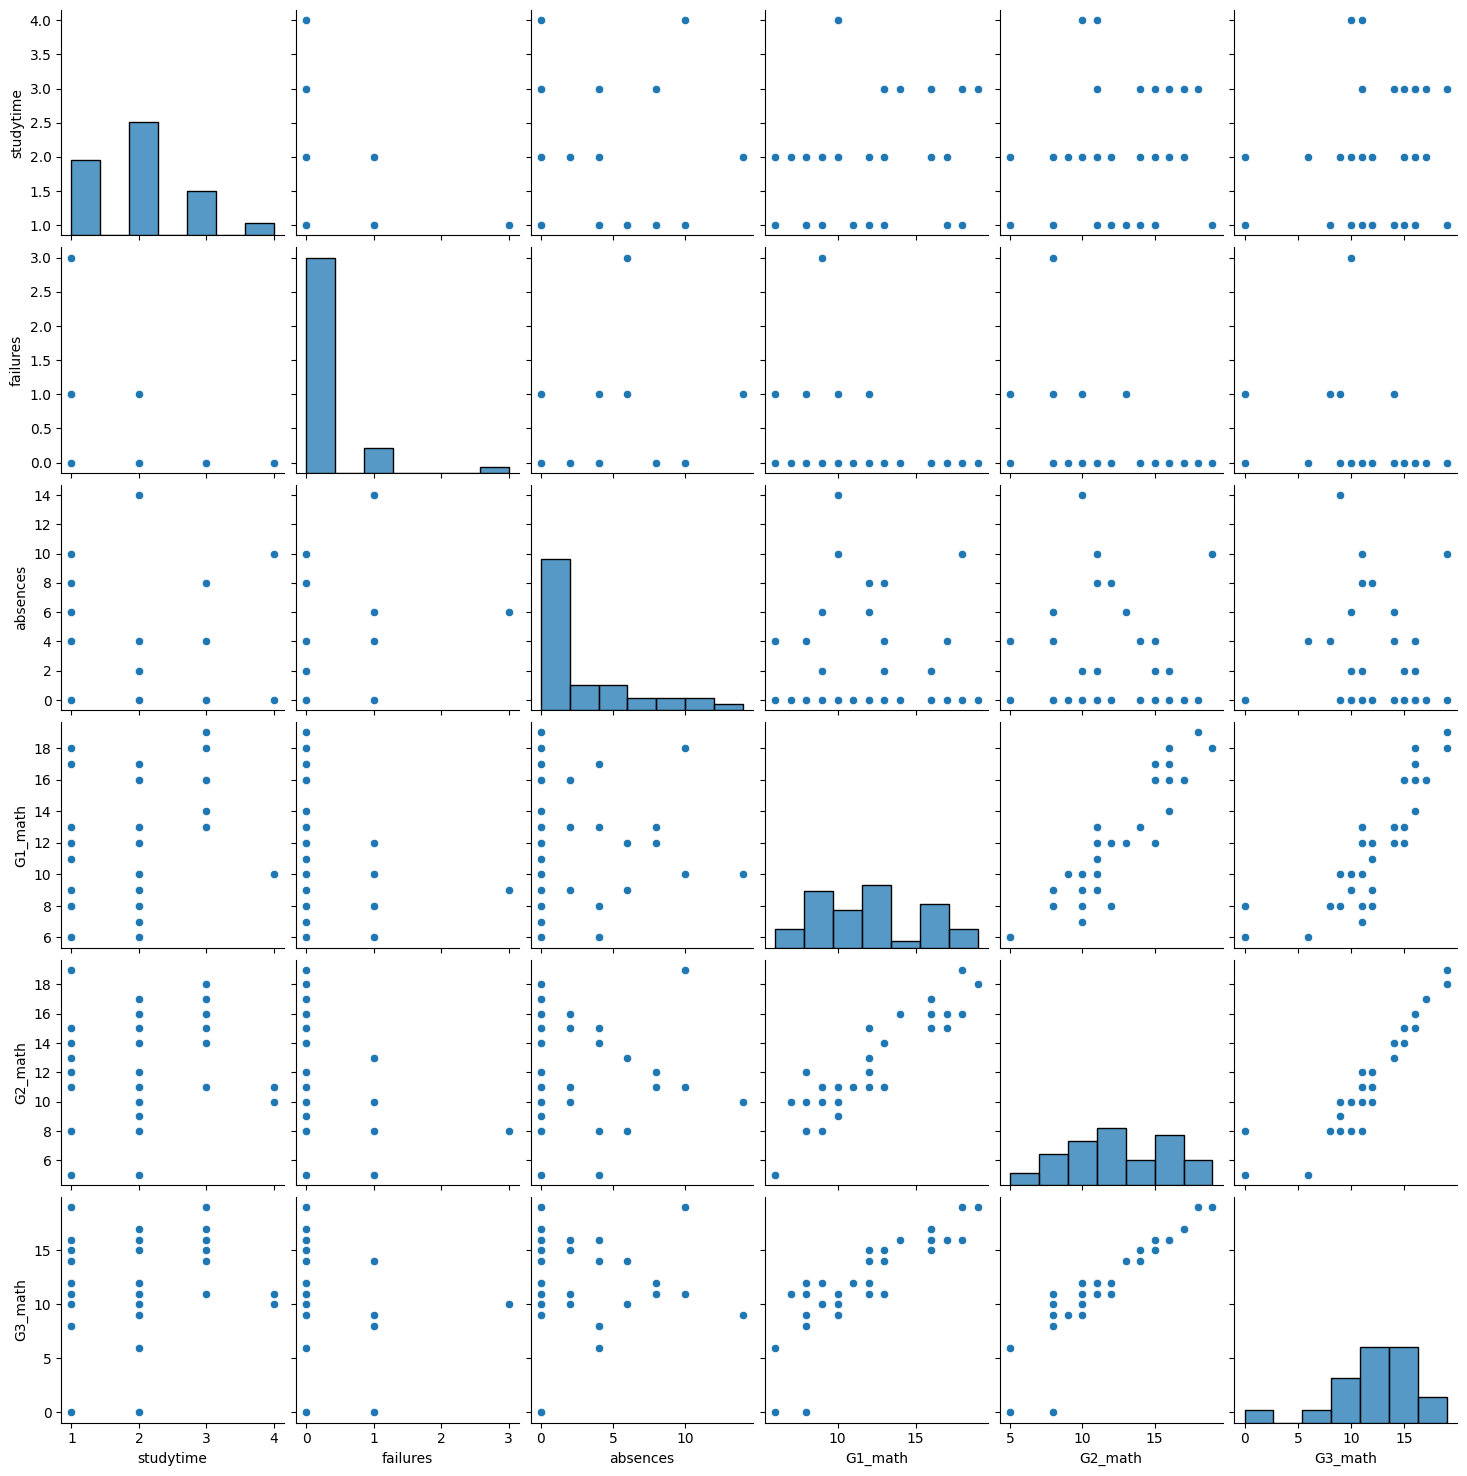

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to visualize
pairplot_features = ['studytime', 'failures', 'absences', 'G1_math', 'G2_math', 'G3_math']

# Create pairplot
sns.pairplot(merged_data[pairplot_features])
plt.show()

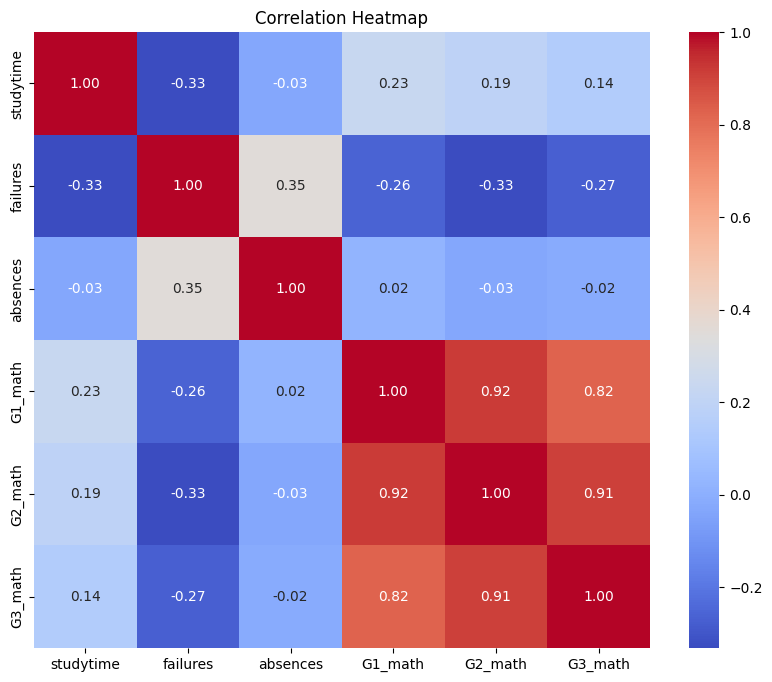

In [10]:
# Calculate correlation matrix
correlation_matrix = merged_data[pairplot_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()


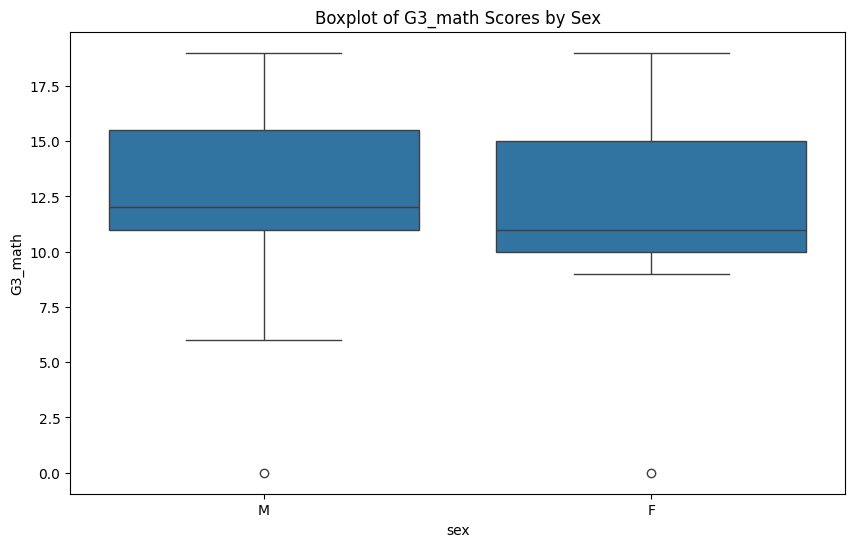

In [11]:
# Example of boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='G3_math', data=merged_data)
plt.title('Boxplot of G3_math Scores by Sex')
plt.show()


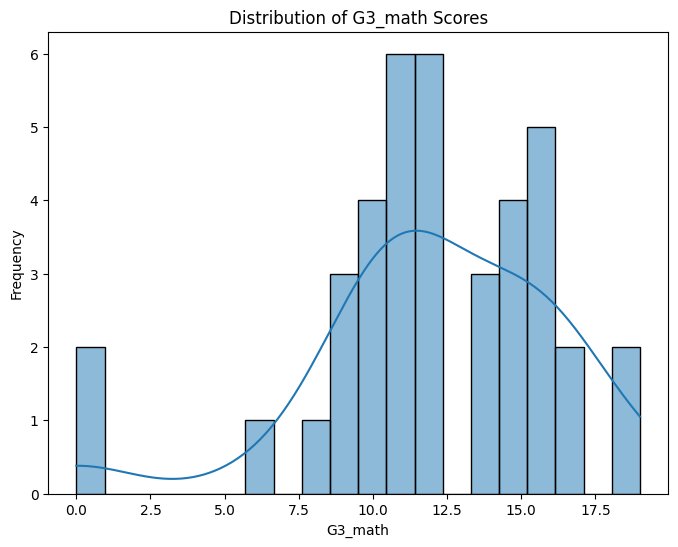

In [12]:
# Example of distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['G3_math'], bins=20, kde=True)
plt.title('Distribution of G3_math Scores')
plt.xlabel('G3_math')
plt.ylabel('Frequency')
plt.show()

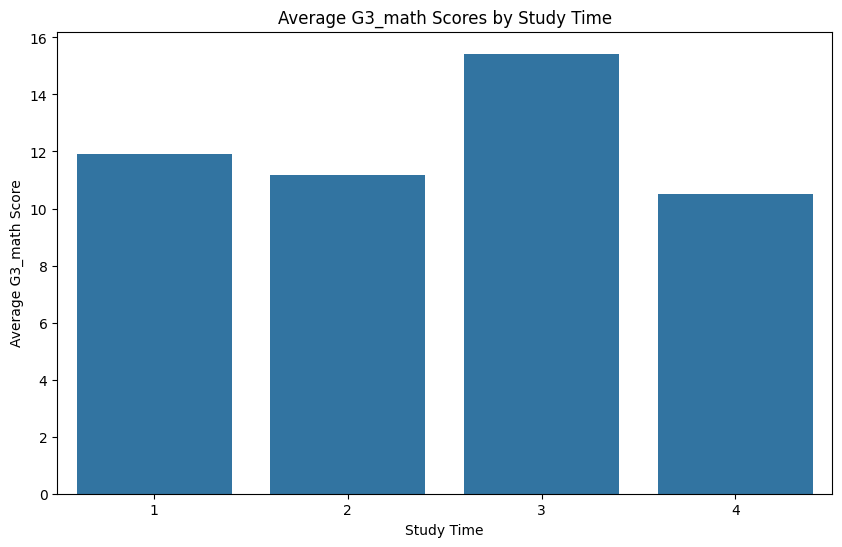

In [13]:
# Example of bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='studytime', y='G3_math', data=merged_data, errorbar=None)
plt.title('Average G3_math Scores by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Average G3_math Score')
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define target variable and features
target = 'G3_por'
features = ['studytime', 'failures', 'absences', 'G1_math', 'G2_math']

# Extract features and target variable
X = merged_data[features]
y = merged_data[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


r2 = model.score(X_test, y_test)
print(f"R-squared: {r2}")

# Example prediction for a new student
new_student = pd.DataFrame([[3,2,1,11,13]], columns=features)  # Example data: studytime=3, failures=2, absences=1, G1=11, G2=13
predicted_score = model.predict(new_student)
print(f"Predicted G3_por score: {predicted_score[0]}")


Mean Squared Error: 0.9711118308499798
R-squared: 0.6746012713382267
Predicted G3_por score: 11.90254384395919


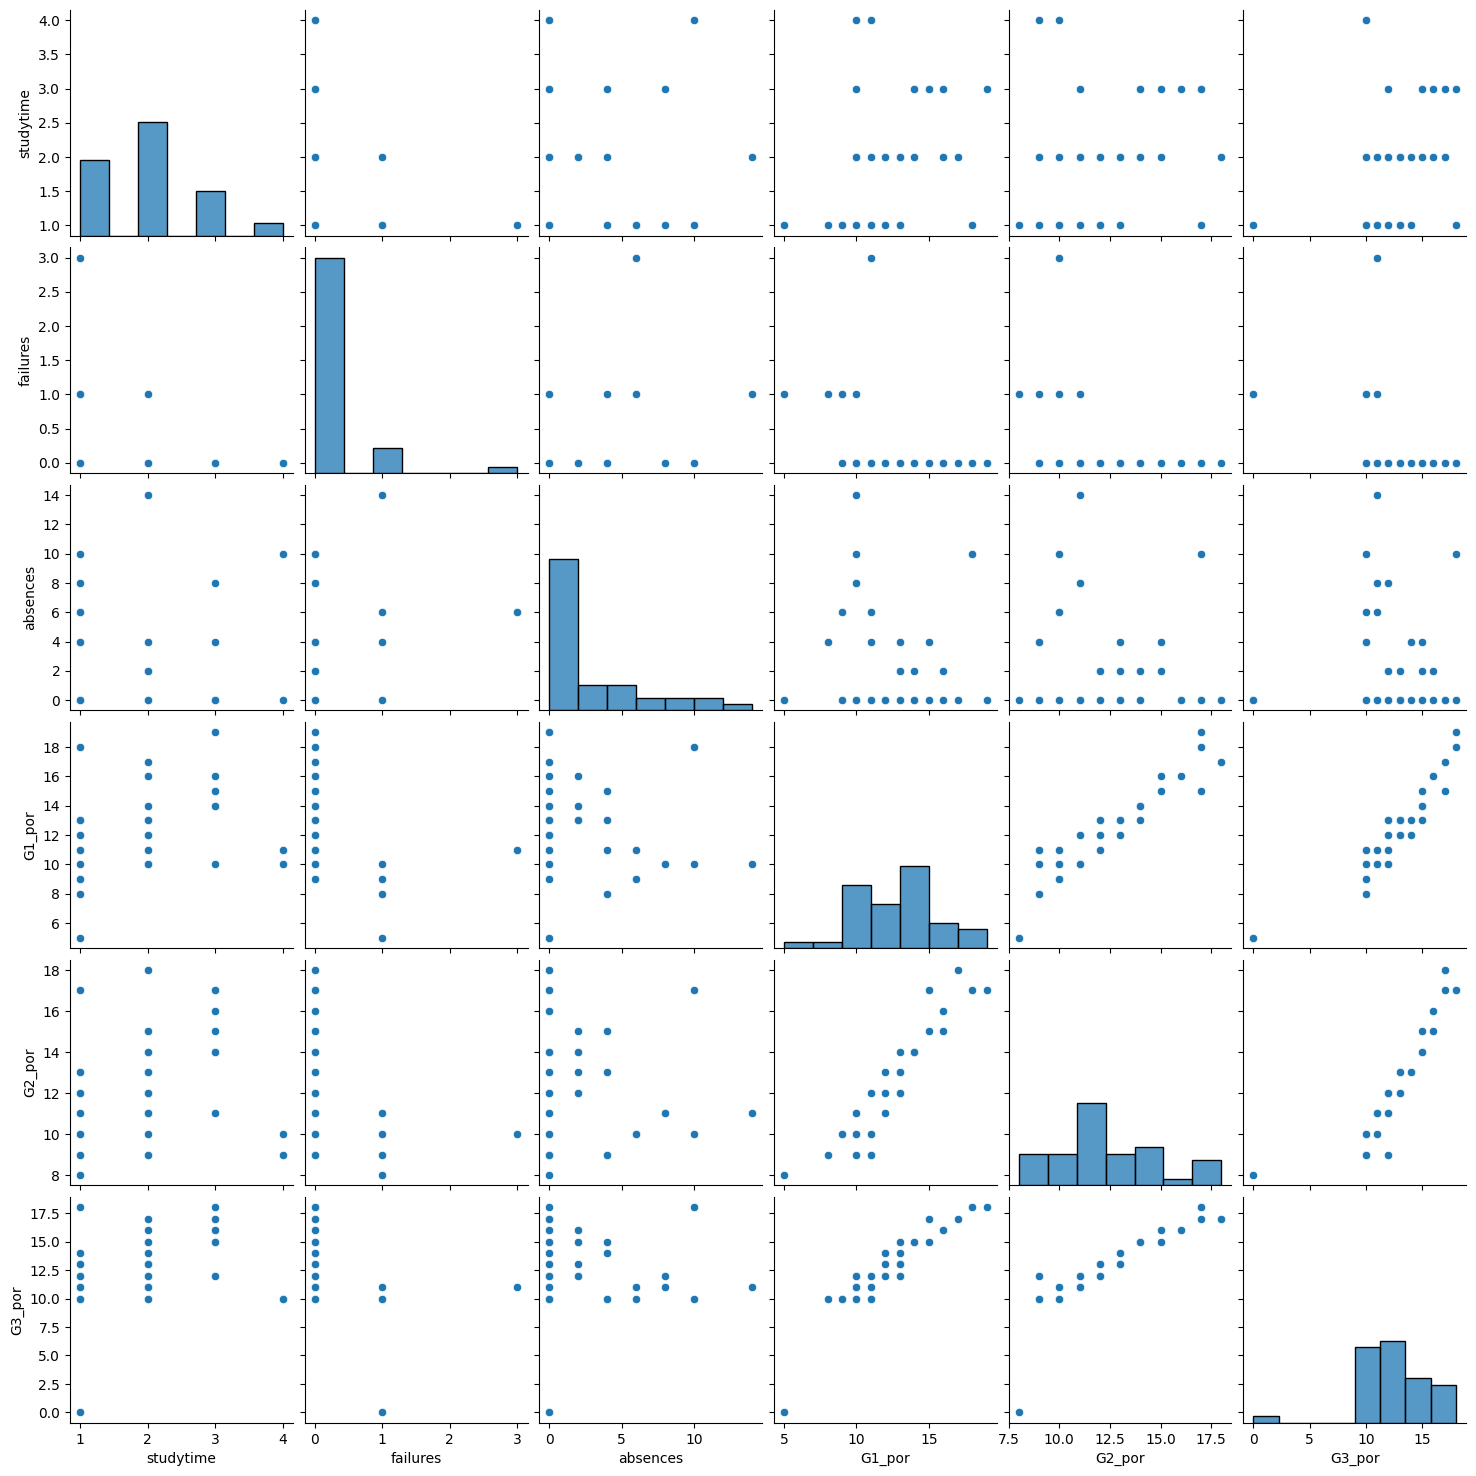

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to visualize
pairplot_features_por = ['studytime', 'failures', 'absences', 'G1_por', 'G2_por', 'G3_por']

# Create pairplot for Portuguese course dataset
sns.pairplot(merged_data[pairplot_features_por])
plt.show()


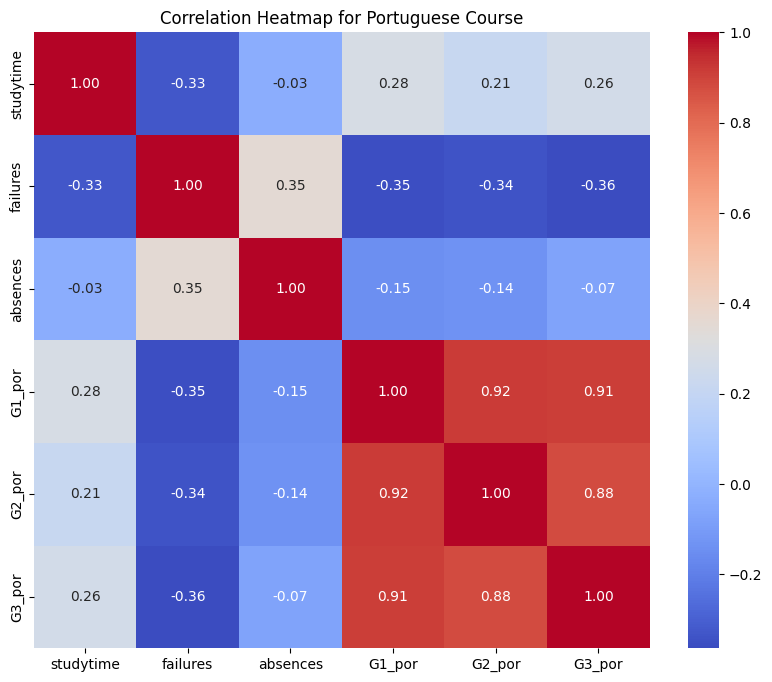

In [17]:
# Calculate correlation matrix for Portuguese course dataset
correlation_matrix_por = merged_data[pairplot_features_por].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_por, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap for Portuguese Course')
plt.show()

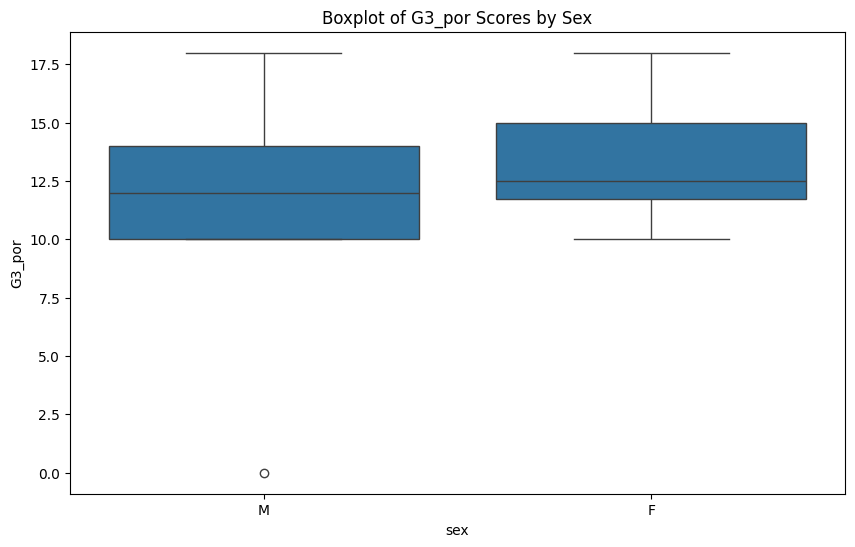

In [18]:
# Example of boxplot for Portuguese course dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='G3_por', data=merged_data)
plt.title('Boxplot of G3_por Scores by Sex')
plt.show()

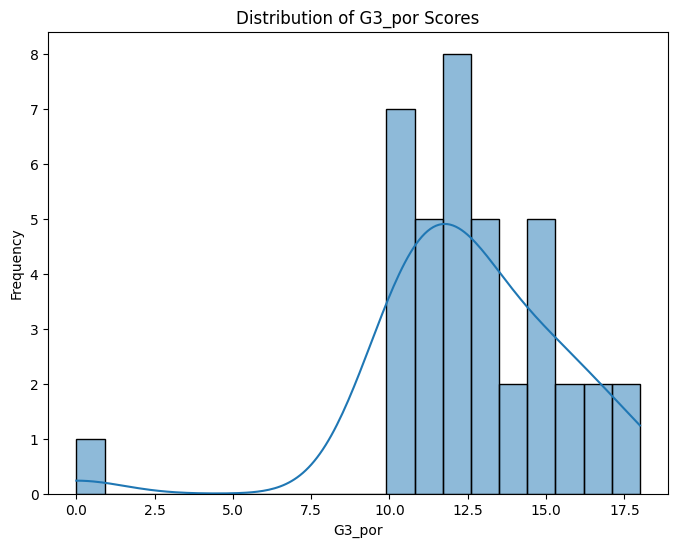

In [19]:
# Example of distribution plot for Portuguese course dataset
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['G3_por'], bins=20, kde=True)
plt.title('Distribution of G3_por Scores')
plt.xlabel('G3_por')
plt.ylabel('Frequency')
plt.show()

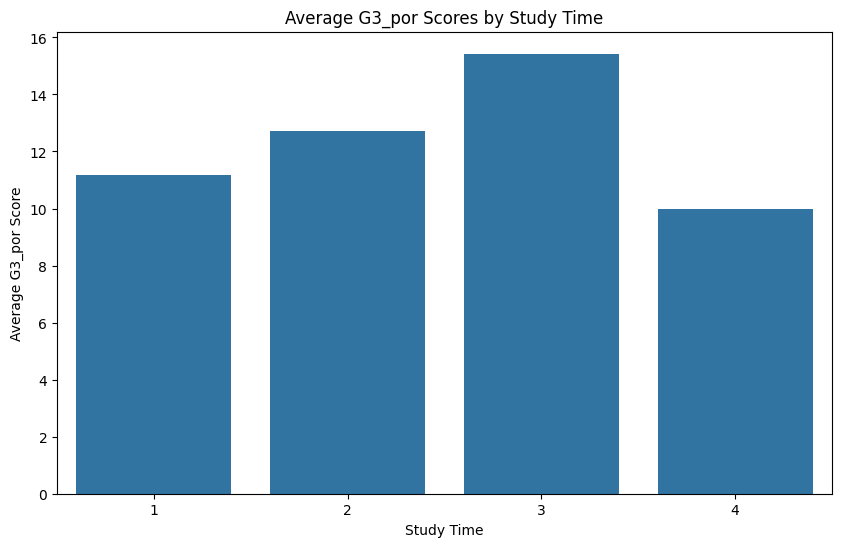

In [20]:
# Example of bar plot for Portuguese course dataset
plt.figure(figsize=(10, 6))
sns.barplot(x='studytime', y='G3_por', data=merged_data, errorbar=None)
plt.title('Average G3_por Scores by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Average G3_por Score')
plt.show()